In [1]:
import pandas as pd
import numpy as np
import json 
import seaborn as sns
import matplotlib.pyplot as plt
import os

from sklearn import linear_model
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, GridSearchCV
import sklearn.ensemble

In [2]:
gg = pd.read_csv("C:\\Users\\Administrator\\Desktop\\Python\\Python Project Vishal\\googleplaystore.csv")

In [3]:
gg.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
gg.shape

(10841, 13)

In [5]:
gg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
gg.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [7]:
for i in gg.columns:
    print(gg[i].value_counts())

ROBLOX                                               9
CBS Sports App - Scores, News, Stats & Watch Live    8
ESPN                                                 7
Candy Crush Saga                                     7
Duolingo: Learn Languages Free                       7
                                                    ..
QR Droid                                             1
my face                                              1
CS Customizer                                        1
SPARK - Live random video chat & meet new people     1
EY TaxChat                                           1
Name: App, Length: 9660, dtype: int64
FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY          

In [8]:
def value_to_float(x):
    # Convert the string feature into float/Integer
    #If there is 'K' or 'M' in the string, convert it to the corresponding number (1000 or 1000000)
    
    if type(x) == float or type(x) == int:
        return x
    if 'K' in x:
        if len(x) > 1:
            return float(x.replace('K', '')) * 10**3
        return 1000.0
    if 'M' in x:
        if len(x) > 1:
            return float(x.replace('M', '')) * 10**6
        return 1000000.0
    
    # If the string cannot be converted, return 0 instead
    try:
        parsed_val = float(x)
    except ValueError:
        parsed_val = 0.0
    return parsed_val

In [9]:
# Fixing inconsistent formatting
gg_cleaned = gg.loc[gg["Rating"].notnull()]
gg_cleaned = gg_cleaned.loc[gg["Rating"] <= 5]

gg_cleaned["Price"] = gg_cleaned["Price"].apply(lambda x: x.replace('$', ''))
gg_cleaned["Installs"] = gg_cleaned["Installs"].apply(lambda x: x.replace('+', ''))
gg_cleaned['Installs'] = gg_cleaned['Installs'].apply(lambda a: str(a).replace(',', '') if ',' in str(a) else a)
gg_cleaned['Installs'] = gg_cleaned['Installs'].apply(lambda a : int(a))
gg_cleaned['Reviews'] = gg_cleaned['Reviews'].apply(lambda a : int(a))

genres = gg_cleaned["Genres"].value_counts().head().index

str_cols = ["Size", "Price"]

for col in str_cols:
    gg_cleaned[[col]] = gg_cleaned[[col]].fillna(value="")
    gg_cleaned[col] = gg_cleaned[col].apply(value_to_float)

In [10]:
gg_cleaned.dropna(inplace=True)

In [11]:
# NaN values dropped 
gg_cleaned.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [12]:
gg_cleaned.shape

(9360, 13)

In [13]:
# inconsistent formatting fixed for Size, Installs and Price 
gg_cleaned.describe()

,Rating,Reviews,Size,Installs,Price
count,9360.000000,9.360000e+03,9.360000e+03,9.360000e+03,9360.000000
mean,4.191838,5.143767e+05,1.894124e+07,1.790875e+07,0.961279
std,0.515263,3.145023e+06,2.302813e+07,9.126637e+07,15.821640
min,1.000000,1.000000e+00,0.000000e+00,1.000000e+00,0.000000
25%,4.000000,1.867500e+02,2.400000e+06,1.000000e+04,0.000000
50%,4.300000,5.955000e+03,9.500000e+06,5.000000e+05,0.000000
75%,4.500000,8.162750e+04,2.700000e+07,5.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+08,1.000000e+09,400.000000


In [14]:
# Size, Reviews,Price and Installs have successfully converted to numeric
gg_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
App               9360 non-null object
Category          9360 non-null object
Rating            9360 non-null float64
Reviews           9360 non-null int64
Size              9360 non-null float64
Installs          9360 non-null int64
Type              9360 non-null object
Price             9360 non-null float64
Content Rating    9360 non-null object
Genres            9360 non-null object
Last Updated      9360 non-null object
Current Ver       9360 non-null object
Android Ver       9360 non-null object
dtypes: float64(3), int64(2), object(8)
memory usage: 1023.8+ KB


In [15]:
# Checking rating over 5
gg_cleaned.loc[gg_cleaned["Rating"] > 5].values

array([], shape=(0, 13), dtype=object)

In [16]:
# There are 7 records where Reviews are greater than Installs 
gg_cleaned[gg_cleaned['Reviews'] > gg_cleaned['Installs']].shape

(7, 13)

In [17]:
# Dropping 7 records that have greater Reviews than Installs
gg_cleaned.drop(gg_cleaned[gg_cleaned['Reviews'] > gg_cleaned['Installs']].index,inplace=True)
gg_cleaned[gg_cleaned['Reviews'] > gg_cleaned['Installs']].shape

(0, 13)

In [18]:
# There no apps where Price is > 0 and Type is "Free"
gg_cleaned[gg_cleaned['Price']>0][gg_cleaned['Type'] == 'Free'].shape

C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


(0, 13)

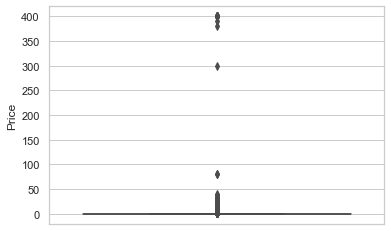

In [19]:
# Price variables seems to have outliers that needs to be addressed
sns.set(style="whitegrid")
sns.boxplot(x=gg_cleaned['Price'],data=gg_cleaned,orient='v')

In [20]:
gg_cleaned[gg_cleaned['Price'] > 200].shape

(15, 13)

In [21]:
# Dropping rows that have Price > 200
gg_cleaned.drop(gg_cleaned[gg_cleaned['Price'] > 200].index,inplace=True)

In [22]:
gg_cleaned[gg_cleaned['Price'] > 200].shape

(0, 13)

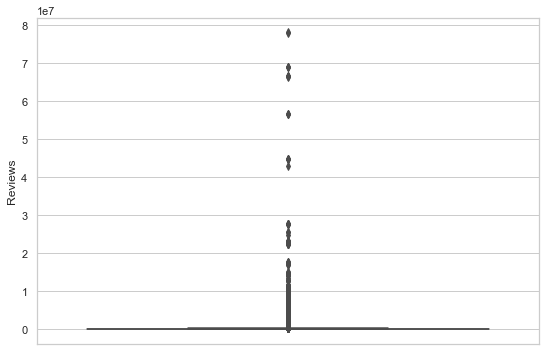

In [23]:
# Reviews seems to have outliers 
plt.figure(figsize=(9,6))
sns.boxplot(x='Reviews',data=gg_cleaned,orient='v')

In [24]:
# There are 9 Records that counts more than 2 millions
gg_cleaned[gg_cleaned['Reviews'] > 20**6].shape

(9, 13)

In [25]:
# Compared to 9 Reviews that counts for over 2 million there are 539 Installs that Counts for more than 2 millions
# This concludes that both Reviews and Installs have outliers 
gg_cleaned[gg_cleaned['Installs'] > 20**6].shape

(539, 13)

In [26]:
#dropping outliers of Reviews and Installs 
gg_cleaned.drop(gg_cleaned[gg_cleaned['Reviews'] > 20**6].index,inplace=True)
gg_cleaned.drop(gg_cleaned[gg_cleaned['Installs'] > 20**6].index,inplace=True)
gg_cleaned.shape

(8799, 13)

In [27]:
gg_cleaned[gg_cleaned['Reviews'] > 20**6].shape
gg_cleaned[gg_cleaned['Installs'] > 20**6].shape

(0, 13)

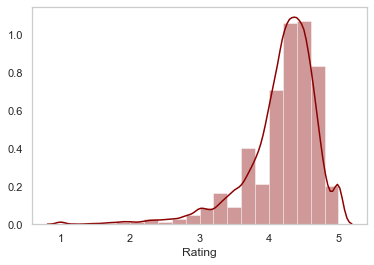

In [28]:
# Having a look at distribution of Rating where most ratings are distributed above 4 
sns.distplot(gg_cleaned['Rating'],kde=True,color='darkred',bins=20).grid()

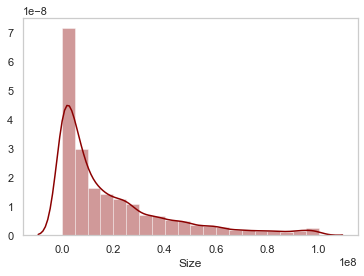

In [29]:
# Having a look at distribution of Size; few apps looks like oversized 1e8(0.0 to 0.05)
sns.distplot(gg_cleaned['Size'],kde=True,color='darkred',bins=20).grid()

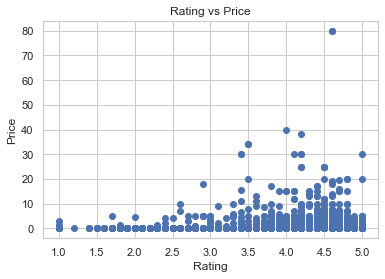

In [30]:
# number of Ratings are getting higher when the Price is getting lower which suggest that people like to rate apps
# that are more affordable to them in terms of Price
plt.scatter(gg_cleaned['Rating'],gg_cleaned['Price'])
plt.title('Rating vs Price')
plt.xlabel('Rating')
plt.ylabel('Price')
plt.show()

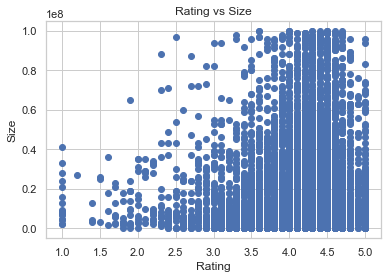

In [31]:
# Below plot clearly mentions that people like lighter apps where they rate lighter app more than heavier app
plt.scatter(gg_cleaned['Rating'],gg_cleaned['Size'])
plt.title('Rating vs Size')
plt.xlabel('Rating')
plt.ylabel('Size')
plt.show()

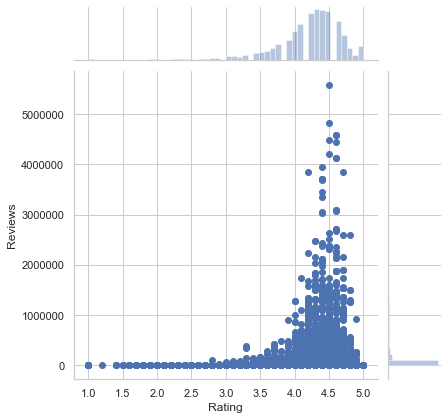

In [32]:
# Plot here clearly mentions that it is not always the case where more Reviews get more Ratings
sns.jointplot(gg_cleaned['Rating'],gg_cleaned['Reviews'])

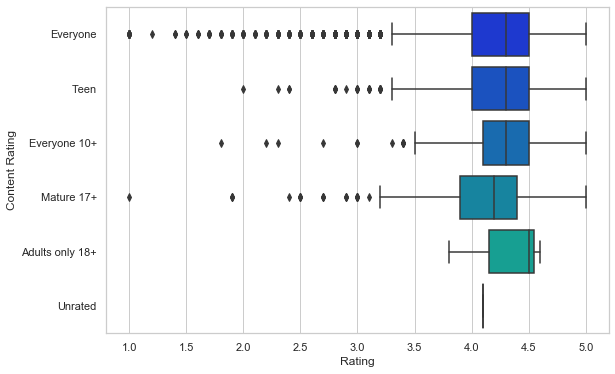

In [33]:
# below figure mentions that teens tend to rate more and most Ratings fall under 'Everyone'
plt.figure(figsize=(9,6))
sns.boxplot(x='Rating',y='Content Rating',data=gg_cleaned,palette='winter')

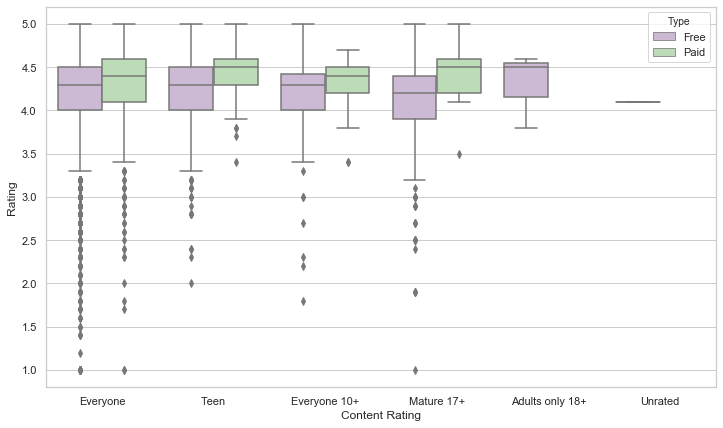

In [34]:
# people tend to vote higher when they pay for it.
# there is no paid applications for adults only (18+)
plt.figure(figsize = (12,7))
sns.boxplot(x='Content Rating', y='Rating', hue='Type', data=gg_cleaned, palette='PRGn')
plt.show()

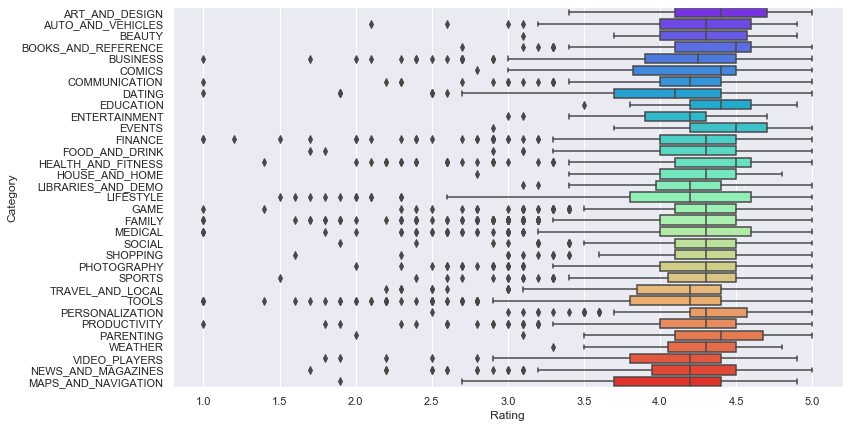

In [35]:
# every category does not differ much. Art and Design, entertainment and Parenting apps have the best rating  
sns.set(rc={'figure.figsize':(12,7)})
sns.boxplot(x="Rating", y="Category",data=gg_cleaned,palette='rainbow')

In [36]:
gg_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8799 entries, 0 to 10840
Data columns (total 13 columns):
App               8799 non-null object
Category          8799 non-null object
Rating            8799 non-null float64
Reviews           8799 non-null int64
Size              8799 non-null float64
Installs          8799 non-null int64
Type              8799 non-null object
Price             8799 non-null float64
Content Rating    8799 non-null object
Genres            8799 non-null object
Last Updated      8799 non-null object
Current Ver       8799 non-null object
Android Ver       8799 non-null object
dtypes: float64(3), int64(2), object(8)
memory usage: 1.3+ MB


In [37]:
inp1 = gg_cleaned[['Rating','Reviews','Category','Installs','Price','Content Rating']]

In [38]:
Reviews = pd.DataFrame(np.log1p(inp1[['Reviews']]))

In [39]:
Installs = pd.DataFrame(np.log1p(inp1[['Installs']]))

In [40]:
Category = pd.DataFrame(pd.get_dummies(inp1['Category'],drop_first=True))

In [41]:
ContentRating = pd.DataFrame(pd.get_dummies(inp1['Content Rating'],drop_first=True))

In [42]:
inp1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8799 entries, 0 to 10840
Data columns (total 6 columns):
Rating            8799 non-null float64
Reviews           8799 non-null int64
Category          8799 non-null object
Installs          8799 non-null int64
Price             8799 non-null float64
Content Rating    8799 non-null object
dtypes: float64(2), int64(2), object(2)
memory usage: 801.2+ KB


In [43]:
inp1 = inp1.drop(['Reviews','Installs','Category','Content Rating'],axis=1)

In [44]:
inp1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8799 entries, 0 to 10840
Data columns (total 2 columns):
Rating    8799 non-null float64
Price     8799 non-null float64
dtypes: float64(2)
memory usage: 526.2 KB


In [45]:
inp2 = pd.concat([inp1,Reviews,Installs,Category,ContentRating],axis=1)

In [46]:
inp2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8799 entries, 0 to 10840
Data columns (total 41 columns):
Rating                 8799 non-null float64
Price                  8799 non-null float64
Reviews                8799 non-null float64
Installs               8799 non-null float64
AUTO_AND_VEHICLES      8799 non-null uint8
BEAUTY                 8799 non-null uint8
BOOKS_AND_REFERENCE    8799 non-null uint8
BUSINESS               8799 non-null uint8
COMICS                 8799 non-null uint8
COMMUNICATION          8799 non-null uint8
DATING                 8799 non-null uint8
EDUCATION              8799 non-null uint8
ENTERTAINMENT          8799 non-null uint8
EVENTS                 8799 non-null uint8
FAMILY                 8799 non-null uint8
FINANCE                8799 non-null uint8
FOOD_AND_DRINK         8799 non-null uint8
GAME                   8799 non-null uint8
HEALTH_AND_FITNESS     8799 non-null uint8
HOUSE_AND_HOME         8799 non-null uint8
LIBRARIES_AND_DEMO     8

In [47]:
y = inp2[['Rating']]
X = inp2.drop('Rating',axis=1)

In [48]:
X.shape, y.shape

((8799, 40), (8799, 1))

In [49]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8799 entries, 0 to 10840
Data columns (total 40 columns):
Price                  8799 non-null float64
Reviews                8799 non-null float64
Installs               8799 non-null float64
AUTO_AND_VEHICLES      8799 non-null uint8
BEAUTY                 8799 non-null uint8
BOOKS_AND_REFERENCE    8799 non-null uint8
BUSINESS               8799 non-null uint8
COMICS                 8799 non-null uint8
COMMUNICATION          8799 non-null uint8
DATING                 8799 non-null uint8
EDUCATION              8799 non-null uint8
ENTERTAINMENT          8799 non-null uint8
EVENTS                 8799 non-null uint8
FAMILY                 8799 non-null uint8
FINANCE                8799 non-null uint8
FOOD_AND_DRINK         8799 non-null uint8
GAME                   8799 non-null uint8
HEALTH_AND_FITNESS     8799 non-null uint8
HOUSE_AND_HOME         8799 non-null uint8
LIBRARIES_AND_DEMO     8799 non-null uint8
LIFESTYLE              879

In [50]:
y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8799 entries, 0 to 10840
Data columns (total 1 columns):
Rating    8799 non-null float64
dtypes: float64(1)
memory usage: 457.5 KB


In [51]:
y['Rating'] = y['Rating'].astype('int')

C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [52]:
type(y['Rating'][0])

numpy.int32

In [53]:
X.shape,y.shape

((8799, 40), (8799, 1))

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, y, random_state=1)

lm = LinearRegression()
lm.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [55]:
Predict_rating_train = lm.predict(X_train)
Predict_rating_test = lm.predict(X_test)

In [56]:
print(lm.score(X_train,Y_train))

0.10188827565274383


In [57]:
print(lm.score(X_test,Y_test))

0.10422007670512812


In [58]:
y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8799 entries, 0 to 10840
Data columns (total 1 columns):
Rating    8799 non-null int32
dtypes: int32(1)
memory usage: 423.1 KB


In [59]:

###                                                  ### setting independeent variables x by dropping dep variable 
X_train1, X_test1, y_train1, y_test1 = train_test_split(X,y,test_size=0.30, 
                                                    random_state=101)

In [60]:
### model evaluation packages
from sklearn.metrics import accuracy_score, log_loss

### classifier packages
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

### Transformer packages
from sklearn.preprocessing import StandardScaler

### pipeline
from sklearn.pipeline import Pipeline

In [61]:
classifiers = [
    KNeighborsClassifier(3),
    LogisticRegression(),
    SVC(kernel="rbf", C=0.025, probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier()
    ]

In [63]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn import tree
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import Binarizer
make_pipeline(Binarizer(),MultinomialNB()) 
from sklearn.model_selection import GridSearchCV
param_grid = dict(reduce_dim__n_components=[2, 5, 10],clf__C=[0.1, 10, 100])
estimators = [('reduce_dim', PCA()), ('clf', SVC())]
pipe =Pipeline(estimators)
pipe
grid_search = GridSearchCV(pipe, param_grid=param_grid)

In [64]:
pipe.set_params(clf__C=10) 

Pipeline(memory=None,
         steps=[('reduce_dim',
                 PCA(copy=True, iterated_power='auto', n_components=None,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('clf',
                 SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3,
                     gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [65]:
pipe.named_steps['reduce_dim']

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [66]:
pipe.named_steps.reduce_dim is pipe.named_steps['reduce_dim']

True

In [67]:
pipe.steps[0]

('reduce_dim',
 PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
     svd_solver='auto', tol=0.0, whiten=False))

In [68]:
# GradientBoostingClassifier got the score of 0.752 
for classifier in classifiers:
    pipe = Pipeline(steps=[('standardize', StandardScaler()),
                      ('classifier', classifier)])
    pipe.fit(X_train1, y_train1)  
    print(classifier)
    print("model score: %.3f" % pipe.score(X_test1, y_test1))

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\pipeline.py:356: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')
model score: 0.698


C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
model score: 0.743


C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=0.025, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
model score: 0.747
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
model score: 0.668
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                  

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\pipeline.py:356: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)
model score: 0.734


C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
model score: 0.752


In [69]:
print('R2 score: {0:.2f}'.format(pipe.score(X_test1, y_test1)))

R2 score: 0.75


In [70]:
print('R2 score: {0:.2f}'.format(pipe.score(X_train1, y_train1)))

R2 score: 0.79
